# PROJECT NAME : CHURN PREDICTION (TELECOM CUSTOMER DATASET)

#### Aim:

The Main Aim of the Project is to Predict whether the Customer is Going to Stop his services or Not.(Churn Prediction)

#### Life Cycle of this Project:

* Importing the Data 
  0.1 This may Include varities of sources like 
      0.1.1 Companies Official Database API's 
      0.1.2 Cloud Service Database Like (Azure, AWS, GCP)
      0.1.3 Stream Analytics Pipeline Includes Messaging Systems(Apache Kafka), Streaming Platforms(Apache Spark), Databases, Apps etc.

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Selection
5. Model Building with Hyperparametre Tuning
6. Model Deployment (Pickle File for Developing into an Web App)
7. Running an Test Cases for Newly Coming Data

In [1]:
import pandas as pd                                   ### For reading the Tabular Data 
import numpy as np                                    ### For Numerical Analytics
pd.pandas.set_option('display.max_columns', None)     ### Displaying all the columns

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading the data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### Number of rows and Columns
data.shape

(7043, 21)

In [4]:
### collect some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()      ### Distribution of data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 1.0 Data Analysis :

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
8. Correlation
7. Relationship between independent and dependent feature(Churn)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
### Features with Nan Values
Nan_columns = [feature for feature in data.columns if data[feature].isnull().sum() > 1]
Nan_columns 

[]

No Nan Values in the data

In [8]:
### Lets Pickup the Numerical Variables
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges']

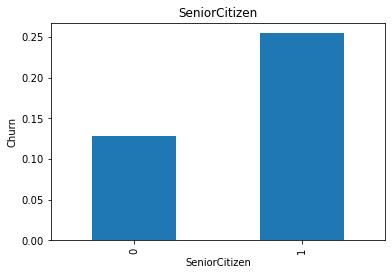

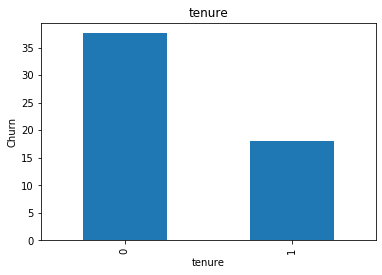

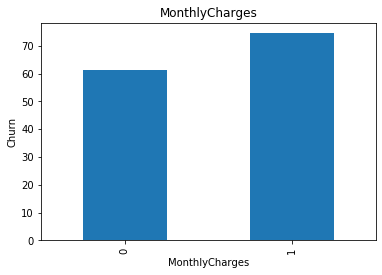

In [9]:
### Distribution of Numerical Data With Respect to the Output(Dependent FEature)
for feature in numerical_feature:
    df = data.copy()
    df['Churn'] = np.where(df['Churn']=="Yes",1,0 )     # Going to replace Yes in Churn Column with 1 and No with 0
    
    df.groupby("Churn")[feature].mean().plot.bar()     # Grouping the Churn COlumn and Comparing with NUmerical Features               
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.title(feature)
    plt.show()

In [10]:
### Categorical Features 
categoircal_features = [feature for feature in data.columns if feature not in numerical_feature + ['customerID'] + ['Churn']]
categoircal_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

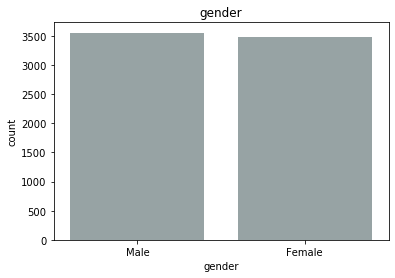

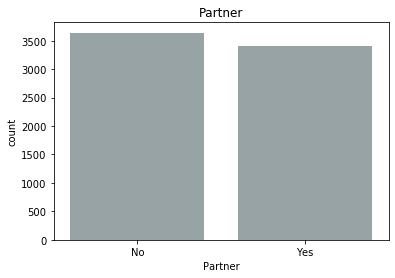

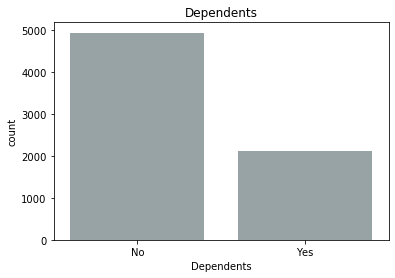

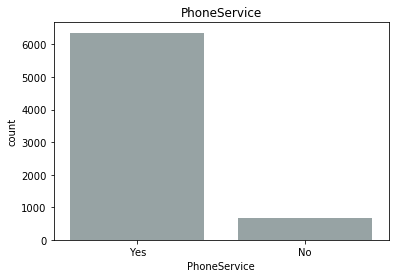

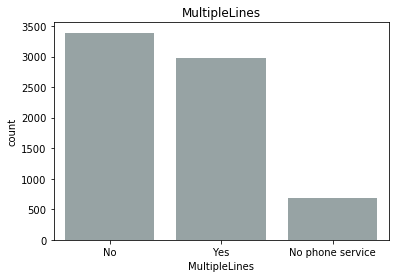

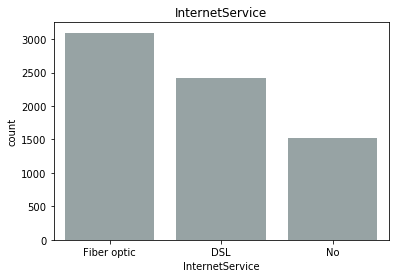

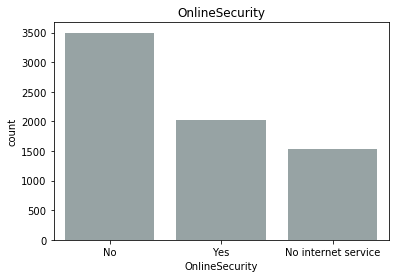

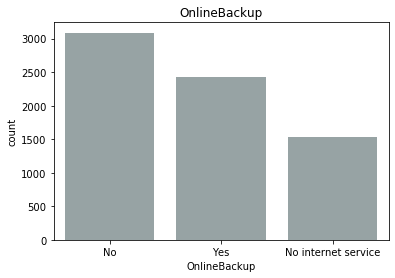

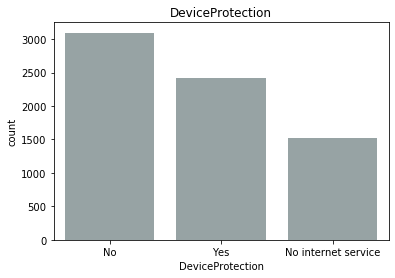

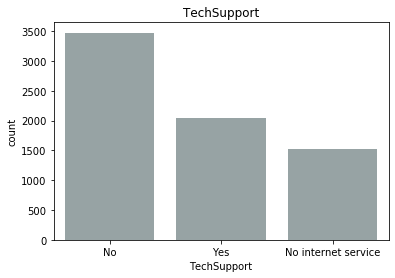

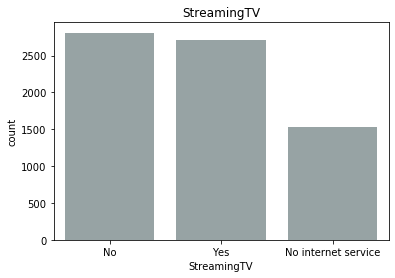

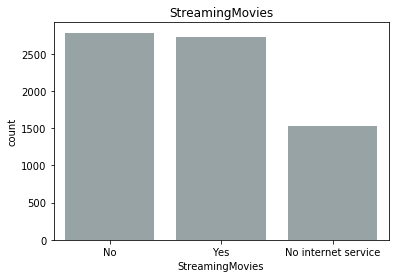

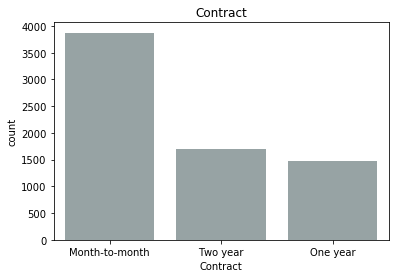

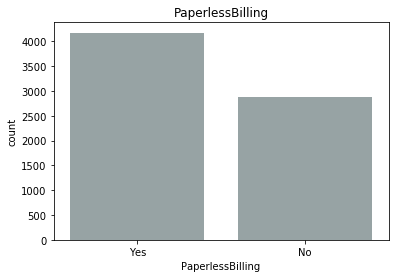

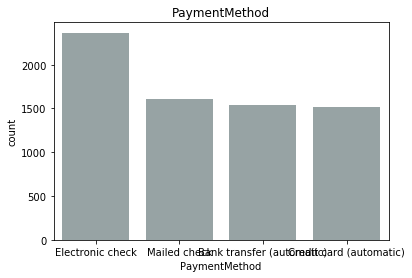

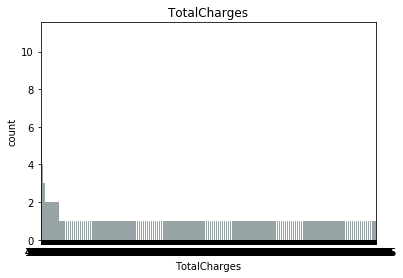

In [11]:
### Distribution of Categorical Features
for feature in categoircal_features:
    sns.countplot(data[feature], color="#95a5a6", order=data[feature].value_counts().index)
    plt.title(feature)
    plt.show()

Here From the above graphs there is no chance for cardinal Features too

In [12]:
### Number of Unique Features in Categorical Data

for feature in categoircal_features:
    print("{} has {} Number of Unique Values".format(feature, data[feature].nunique()))

gender has 2 Number of Unique Values
Partner has 2 Number of Unique Values
Dependents has 2 Number of Unique Values
PhoneService has 2 Number of Unique Values
MultipleLines has 3 Number of Unique Values
InternetService has 3 Number of Unique Values
OnlineSecurity has 3 Number of Unique Values
OnlineBackup has 3 Number of Unique Values
DeviceProtection has 3 Number of Unique Values
TechSupport has 3 Number of Unique Values
StreamingTV has 3 Number of Unique Values
StreamingMovies has 3 Number of Unique Values
Contract has 3 Number of Unique Values
PaperlessBilling has 2 Number of Unique Values
PaymentMethod has 4 Number of Unique Values
TotalCharges has 6531 Number of Unique Values


Here we can see the total charges we need to change it into an Integer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DF560D0>,
      dtype=object)

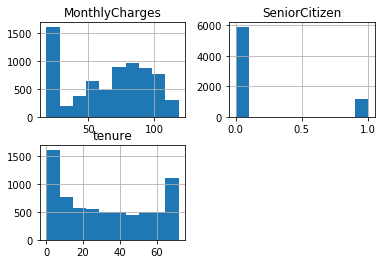

In [13]:
### Distribution of Data
data.hist()

Data is Skewed

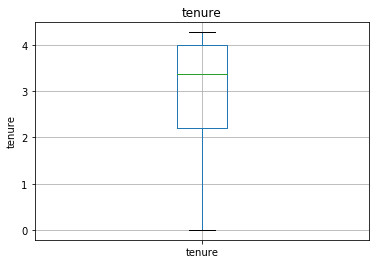

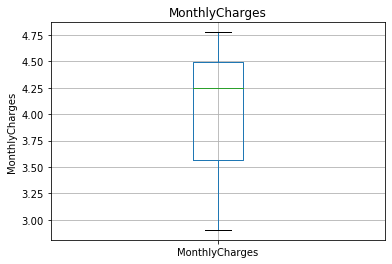

In [14]:
### Finding the Outliers
numerical_feature.remove("SeniorCitizen")
for feature in numerical_feature:
    df[feature] = np.log(df[feature])    ### Since the data is skewed
    df.boxplot(column=feature)
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

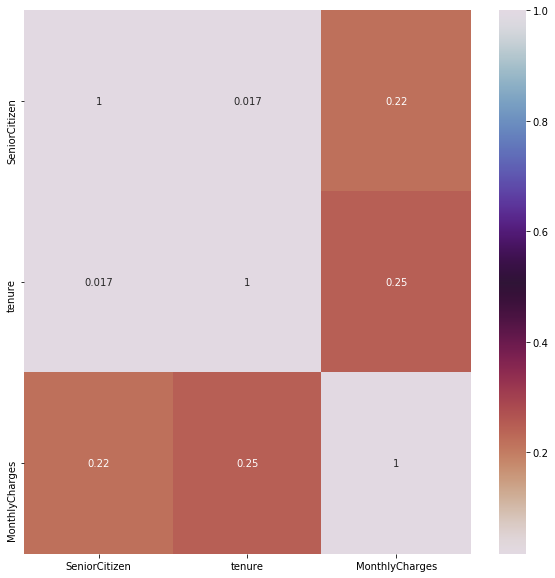

In [15]:
### Correlation Matrix

correlation = data.corr()                                                         # Forming Correlation Table
correlation_matrix = correlation.index                                            # Picking up the Columns
                                                                               
plt.figure(figsize=(10,10))                                                       # Figure Size
sns.heatmap(data[correlation_matrix].corr(), cmap = 'twilight_r', annot = True)   # sns Heatmap for Correlation

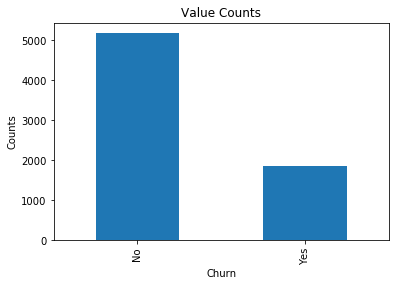

In [16]:
### Dependent Feature Checking for Oversample or Downsample                       
counts = pd.value_counts(data["Churn"], sort=True)                   # Counting NUmber of Yes and No's
counts.plot(kind="bar")
plt.xlabel("Churn")
plt.ylabel("Counts")
plt.title("Value Counts")
plt.show()

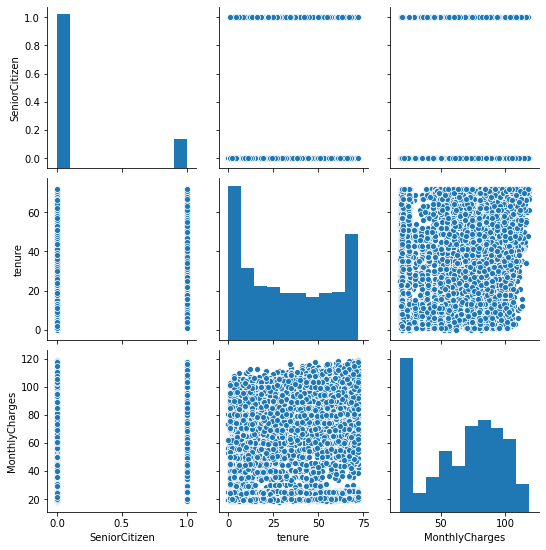

In [17]:
### Pairplot for distirbution of Data
sns.pairplot(data)

### 2.0 Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values (In Our Case No Missing Values)
2. Temporal variables (No Temporal Values Too)
3. Categorical variables: remove rare labels 
4. Encoding Categorical Variables
4. Standarise the values of the variables to the same range

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
### Converting the total charge from dtype object to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], downcast='integer', errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

In [20]:
### Since the Data is Skewed
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!="O"]
numerical_feature.remove('SeniorCitizen')
print(numerical_feature)
for feature in numerical_feature:
    data[feature] = np.log(data[feature])

['tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
### Handling Rare Categorical Variables
categoircal_features.remove("TotalCharges")

for feature in categoircal_features:
    df = data.copy()
    df["Churn"] = np.where((df["Churn"]=="Yes"),1,0)
    temp = df.groupby(feature)["Churn"].count()/len(df)                              #Collecting the Total Values
    temp_df = temp[temp>0.01].index                                                  # Values Greater that .01% index are Noted
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], "Rare_var") # Replacing rare Variables

In [22]:
### Transforming the Categorical Variables into Labels
# Lets do with Label Encoding since there is no Cardinality
categoircal_features.append("Churn")

df = data[categoircal_features]                                                                   

data.drop(categoircal_features, axis=1, inplace=True)                                 #Dropping Categorical Vairables

from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)                                         # Transforming the characters to Labels

In [23]:
### Concating the Whole Dataset into a Single Data
data = pd.concat([data,df], axis=1)
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0,0.000000,3.396185,3.396185,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,3.526361,4.042174,7.544068,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,0.693147,3.986202,4.683519,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,3.806662,3.744787,7.517928,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,0.693147,4.258446,5.021575,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [24]:
### Scaling the Value 
from sklearn.preprocessing import MinMaxScaler

scaling_feature = [feature for feature in data.columns if feature not in ["customerID", "Churn"]]
scaling_feature

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [25]:
# Since the Columns Tenure has infinte Values in it
data.replace([np.inf, -np.inf], 0, inplace=True)       # Replacing inf values with 0

In [26]:
### fitting the values to Scaler function
scaler=MinMaxScaler()
scaler.fit(data[scaling_feature])

MinMaxScaler()

In [27]:
df = pd.concat([data[["customerID", "Churn"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[scaling_feature]), columns=scaling_feature)],
                    axis=1)
df.head()

,customerID,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,5575-GNVDE,0,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,3668-QPYBK,1,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,7795-CFOCW,0,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,9237-HQITU,1,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


In [28]:
df=df[[feature for feature in data.columns]]
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0
1,5575-GNVDE,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0
2,3668-QPYBK,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1
3,7795-CFOCW,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0
4,9237-HQITU,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,1


In [29]:
### Dependent and Independent Variables
x = df.drop(["customerID","Churn"], axis=1)
y = df["Churn"]

In [30]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


In [31]:
x.fillna(0,inplace=True)

In [32]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.743115,0.820208,0.759890,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000
7039,0.0,1.000000,0.925060,0.973088,0.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333
7040,0.0,0.560693,0.258220,0.474924,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
7041,1.0,0.324153,0.750347,0.455008,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [33]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

### 3.0 Feature Selection:

In [34]:
### Selecting the Best Features from Data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectbestfeatures = SelectKBest(score_func=chi2, k=7)             # K=7 Defines we need 7 most important features from Dataset
fit = selectbestfeatures.fit(x,y)                                  # Fit the Data

In [35]:
scores = pd.DataFrame(fit.scores_)                           # Making the Dataset for scores obtained from fit function
specs = pd.DataFrame(x.columns)                              # Columns name from the Dataset

In [36]:
score_data = pd.concat([specs, scores],axis=1)               # Concating both the DataFrame
score_data.columns=["Specs","Score"]
score_data

,Specs,Score
0,SeniorCitizen,134.351545
1,tenure,139.243166
2,MonthlyCharges,52.580664
3,TotalCharges,39.570619
4,gender,0.258699
5,Partner,82.412083
6,Dependents,133.036443
7,PhoneService,0.097261
8,MultipleLines,4.873460
9,InternetService,4.910514


In [37]:
score_data.sort_values("Score", ascending=False).head(7)       #Top 7 Values

,Specs,Score
16,Contract,557.890083
10,OnlineSecurity,275.805765
13,TechSupport,261.651933
1,tenure,139.243166
0,SeniorCitizen,134.351545
6,Dependents,133.036443
11,OnlineBackup,115.043260


In [38]:
### Using Ensemble Techniques to get 7 imoprtant Features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

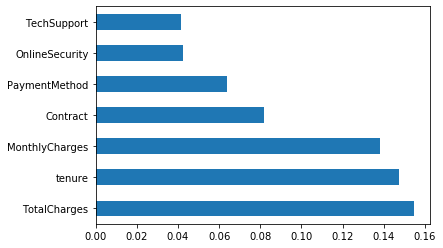

In [39]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)      #Making Pandas series
feat_importance.nlargest(7).plot(kind='barh')                                # Plotting the top 7 features with their scores
plt.show()

In [40]:
### Using Variance Threshold Method----This method accepts only independent Features and Thus used for Unsupervised Learning too
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)  #Basically it removes 0 Variance Features
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [41]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

* This Shows that almost all columns can be used and there is No Zero Variance Columns
* The threshold value may depend on dataset and Domain Expert Peoples

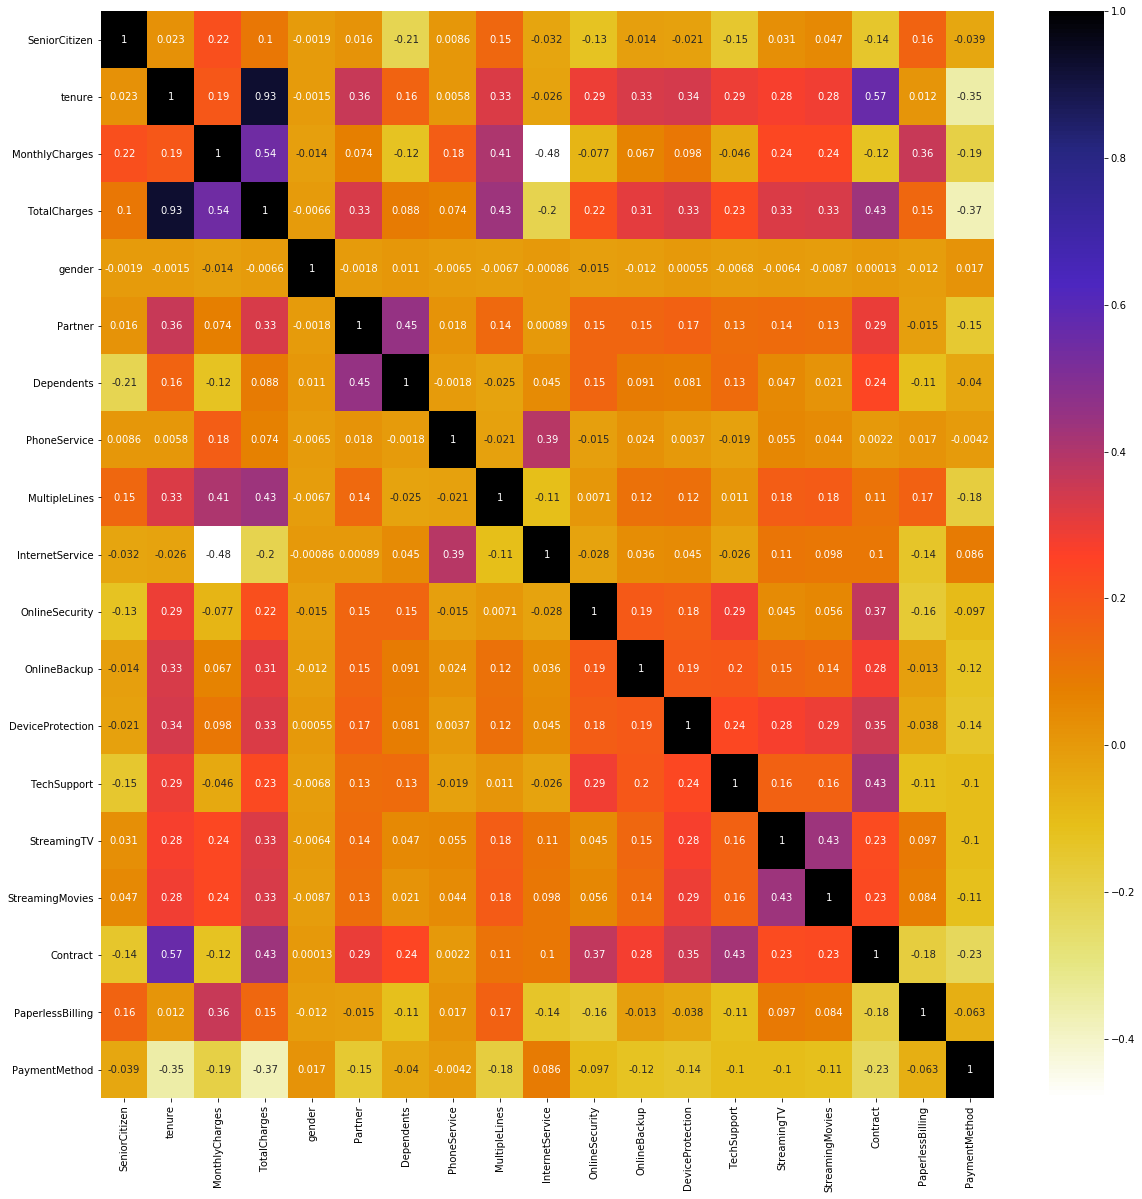

In [42]:
### Correlation Method
plt.figure(figsize=(20,20))
cor = x.corr()                                          # Correlation Table
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)      # annot = Displaying numbers 
plt.show()

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()                                    # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]        # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
correlated_features = correlation(x, 0.7) 
correlated_features

{'TotalCharges'}

* This is the Only column that got highly correlated

The Selected Columns from the above future selection analysis will be:
* Contract	
* OnlineSecurity	
* TechSupport	
* tenure	
* MonthlyCharges 
* SeniorCitizens
* Dependents

In [45]:
selected_features = ["Contract", "OnlineSecurity", "TechSupport", "tenure", "MonthlyCharges", "SeniorCitizen", "Dependents"]
x = x[selected_features]
x.head()

,Contract,OnlineSecurity,TechSupport,tenure,MonthlyCharges,SeniorCitizen,Dependents
0,0.0,0.0,0.0,0.000000,0.262711,0.0,0.0
1,0.5,1.0,0.0,0.824558,0.607633,0.0,0.0
2,0.0,1.0,0.0,0.162077,0.577747,0.0,0.0
3,0.5,1.0,1.0,0.890100,0.448845,0.0,0.0
4,0.0,0.0,0.0,0.162077,0.723110,0.0,0.0


In [46]:
### Checking for imbalanced Dataset
from collections import Counter
cnt = Counter(y)
cnt

Counter({0: 5174, 1: 1869})

In [47]:
### Fitting the data
from imblearn.combine import SMOTETomek
smote = SMOTETomek(0.75)
x_res, y_res = smote.fit_sample(x, y)
cnt_y = Counter(y_res)
cnt_y

Counter({0: 4675, 1: 3381})

### 4.0 Model Selection:

Now we need to select the Optimum Model as a regressor that Could Perform Well:

For that Following steps we need to follow:

* Importing the Different Models Using Sklearn Library
* Building Pipeline For each Model
* Iterate Through Each Model
* Finally calculate accuracy and take the Best Model

In [48]:
### Importing the different Models Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.pipeline import Pipeline  ### For Building Pipelines

In [49]:
### Making the Pipelines for Models
pipeline_logistic_classifier = Pipeline([("Logistic Regression",LogisticRegression())])
pipeline_random_forest_classifier = Pipeline([("Random Forest Classifier",RandomForestClassifier(n_estimators=100))])
pipeline_decision_tree_classifier = Pipeline([("Decision Tree Classifier",DecisionTreeClassifier())])
pipeline_kneighbors_classifier = Pipeline([("KNeighbors Classifier",KNeighborsClassifier())])
pipeline_support_vector_classifier = Pipeline([("Support Vector Classifier",SVC(kernel="rbf", gamma=0.5, degree=2, C=1e3))])
pipeline_gradient_boosting_classifier = Pipeline([("GradientBoostingClassifier",GBC())])

In [50]:
### Lets split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.2, random_state = 0)

In [51]:
pipelines=[pipeline_logistic_classifier,pipeline_random_forest_classifier,pipeline_decision_tree_classifier, pipeline_kneighbors_classifier, pipeline_support_vector_classifier, pipeline_gradient_boosting_classifier]

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [52]:
### Making the dictionary for Models to find which has More efficiency
pipe_dict={0:"Logistic Regression",
           1:"Random Forest Classifier",
           2:"Decision Tree Classifier",
           3:"KNeighbors Classifier",
           4:"Support Vector Classifier",
           5:"Gradient Boosting Classifier"}

best_accuracy=0
best_classifier=""

In [53]:
### Calculate the Score for each Model
for i, model in enumerate(pipelines):
    print("{} has an score of {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression has an score of 0.792803970223325
Random Forest Classifier has an score of 0.8504962779156328
Decision Tree Classifier has an score of 0.8089330024813896
KNeighbors Classifier has an score of 0.8188585607940446
Support Vector Classifier has an score of 0.7965260545905707
Gradient Boosting Classifier has an score of 0.8163771712158809


In [54]:
for i,model in enumerate(pipelines):
    if  model.score(x_test, y_test)>best_accuracy:
        best_accuracy = model.score(x_test, y_test)
        best_pipline = model
        best_classifier = i
print("best Model is {}".format(pipe_dict[best_classifier]))

best Model is Random Forest Classifier


### 5.0 Model Building with Hyperparametre Tuning

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
### Making the support vector Classifier
svc = SVC()
svc.fit(x_train,y_train)             #Builting Model with Default Values

SVC()

In [57]:
### Generating the report 
"""
    Report Consists of 
    1. Confusion Matrix == Helps to identify the CLassification 
    2. Accuracy Score == Determines the accuracy of the Model
    3. Classification Report == Detailed Report on Classification
"""
def generate_report(cmatrix, report, score):
    
    #Generate the Confusion_matrix heatmap
    plt.figure(figsize=(5,5))
    
    sns.heatmap(cmatrix,
                annot=True,
                fmt="d",
                linewidths=5,
                square=True,
                cmap="Blues",
                annot_kws={"size":16},
                xticklabels=["No", "Yes"],
                yticklabels=["No", "Yes"])
    
    plt.xticks(rotation="horizontal", fontsize=16)
    plt.yticks(rotation="horizontal", fontsize=16)
    plt.xlabel("Predicted", size=20)
    plt.ylabel("Actual", size=20)
    title = "Accuracy Score: {0:.4f}".format(score)
    plt.title(title, size=20)
    
    # Display classification report and confusion_matrix
    print(report)
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       893
           1       0.77      0.73      0.75       719

    accuracy                           0.78      1612
   macro avg       0.78      0.78      0.78      1612
weighted avg       0.78      0.78      0.78      1612



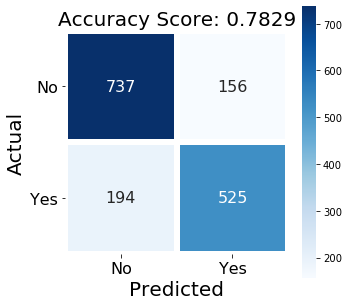

In [58]:
### Evaluating the accuracy and Other Parametres
predictions = svc.predict(x_test)                                   
cmatrix = confusion_matrix(predictions, y_test)
accuracy = accuracy_score(predictions, y_test)
report = classification_report(predictions, y_test)


generate_report(cmatrix, report, accuracy)

# Automated Hyperparameter Tuning

Automated Hyperparameter Tuning can be done by using techniques such as

* Bayesian Optimization
* Gradient Descent
* Evolutionary Algorithms

#### Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.


* Objective Function = defines the loss function to minimize.
* Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
* Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [59]:
### Importing the hyperopt Libraries
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [60]:
### Defining the Hyperparamtres via Domain Space
space = {'C': hp.choice('C', [0.1, 1, 10, 100, 1000]),
        'kernel': hp.choice('kernel',['rbf']),
        'gamma': hp.choice('gamma', [0.01, 1.0, 10.0, 100.0])
         }

In [61]:
space

{'C': <hyperopt.pyll.base.Apply at 0x1296be50>,
 'kernel': <hyperopt.pyll.base.Apply at 0x1296bf70>,
 'gamma': <hyperopt.pyll.base.Apply at 0x12978050>}

In [62]:
### Defining Objective Funtion
def objective(space):
    model = SVC(C = space['C'],
                kernel = space['kernel'],
                gamma = space['gamma']
                )
    
    accuracy = cross_val_score(model, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [63]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████| 80/80 [31:31<00:00, 23.64s/trial, best loss: -0.8274383339195968]


{'C': 2, 'gamma': 3, 'kernel': 0}

In [64]:
### Fitting the Hyperparametre Model
classifier = SVC(C=10,gamma=100.0,kernel='rbf',)
classifier.fit(x_train, y_train)

SVC(C=10, gamma=100.0)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       885
           1       0.83      0.77      0.80       727

    accuracy                           0.82      1612
   macro avg       0.82      0.82      0.82      1612
weighted avg       0.82      0.82      0.82      1612



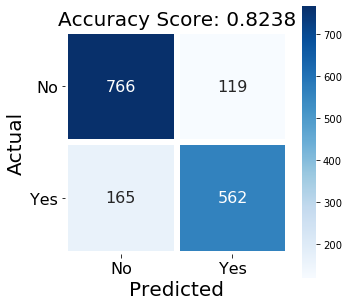

In [65]:
predictions = classifier.predict(x_test)
cmatrix = confusion_matrix(predictions, y_test)
report = classification_report(predictions, y_test)
score = accuracy_score(predictions, y_test)

generate_report(cmatrix, report, score)

* Getting Good results Lets Compare With Randomied Search CV

In [66]:
### Lets try with RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
params = {'C'            :  [0.1, 1, 10, 100, 1000],
          'kernel'       :  ['rbf'],
          'gamma'        :  [0.01, 1.0, 10.0, 100.0],
          }

In [67]:
classifier_svc = SVC()
random_search=RandomizedSearchCV(classifier_svc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [68]:
### Fit the Randomsearch Model
random_search.fit(x_res, y_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   31.3s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.01, 1.0, 10.0, 100.0],
                                        'kernel': ['rbf']},
                   scoring='roc_auc', verbose=3)

In [69]:
### Choosing the Best estimator
random_search.best_estimator_

SVC(C=10, gamma=0.01)

In [70]:
### Best params
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [71]:
classifier = SVC(kernel='rbf',gamma=0.01,C=10)
classifier.fit(x_train, y_train)

SVC(C=10, gamma=0.01)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       900
           1       0.77      0.74      0.75       712

    accuracy                           0.79      1612
   macro avg       0.79      0.78      0.78      1612
weighted avg       0.79      0.79      0.79      1612



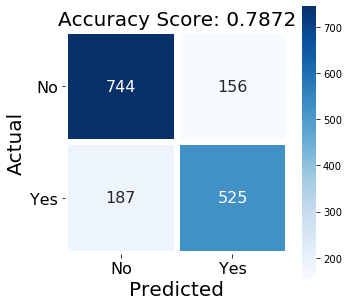

In [72]:
predictions = classifier.predict(x_test)
cmatrix = confusion_matrix(predictions, y_test)
report = classification_report(predictions, y_test)
score = accuracy_score(predictions, y_test)

generate_report(cmatrix, report, score)

* Lets take RandomizedSearchCV model as Classifier

In [80]:
classifier = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)

In [81]:
classifier.fit(x_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [ ]:
### Lets try it with cross_validation Techniques
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_res,y_res,cv=10)

In [ ]:
score

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)
skf.get_n_splits(x,y)

In [ ]:
accuracy=[]

# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X1_train, X1_test = x.iloc[train_index], x.iloc[test_index] 
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction=classifier.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)

### 6.0 Model Deployment (Pickle File for Developing into an Web App)

In [82]:
import pickle

### Save the Model to Local disk
pickle.dump(classifier,open("model.pkl","wb"))

In [83]:
### Saving the Scaler
pickle.dump(scaler, open("scaler.pkl","wb"))